In [1]:
import pandas as pd

train_df = pd.read_csv("../data/train.csv")
train_df

,id,category,is_liquid,nutritional_saturated_fat_100g,nutritional_carbohydrates_100g,nutritional_fat_100g,nutritional_sugars_100g,nutritional_proteins_100g,nutritional_fiber_100g,nutritional_energy_100g,nutritional_salt_100g,ingredients_ordered,target
0,765866d8167564278da2cf67aac203af,Vegano y vegetariano,0,1.9,NaN,16.8,0.8,16.7,4.3,272.0,1.41,"['gR05M7hdHDnkxI1EY0jB', 'SsJ4xBTSIBSpMwWeQFSC...",1
1,819227b8191615cea03aaf6763099b85,Panes,0,0.9,51.0,4.7,7.4,8.9,3.2,291.0,1.40,"['nJsnpHiBOUfvj5itad3B', 'cSoODVpMKhGnpTL6xxSn...",1
2,3ab004c9bf842cc6f87368e1daada35c,Verduras y hortalizas,0,0.0,1.0,0.0,0.0,0.7,1.2,9.0,0.80,"['0QGKoQHlkIBm6SlHSILI', 'cSoODVpMKhGnpTL6xxSn...",0
3,c31ebe68689adeac9900e94cc96199bc,Panes,0,0.6,49.0,3.6,3.2,9.2,5.5,276.0,0.98,"['nJsnpHiBOUfvj5itad3B', 'cSoODVpMKhGnpTL6xxSn...",1
4,334ee09448335590a3898d28476f1195,"Arroz, pasta y otros cereales",0,0.0,79.0,1.0,0.0,5.1,0.0,352.0,0.00,['Erwdjd3OtzRMjlHmEHdG'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,484083a26b3caf7f46973f39216e29bf,Yogures,0,5.0,14.4,7.7,14.1,2.9,0.0,39.0,0.10,"['sG2ApLdn0OnEW3OaCMys', 'c66gvYfTTXDE8EHOKVVG...",1
11996,58c1751cf8f58b8bc7f8e5848f1fed09,Conservas,0,3.5,0.2,16.0,0.0,1.3,3.1,156.0,2.60,"['cSoODVpMKhGnpTL6xxSn', 'ViRR41yHpkGvT0tdwY2V...",0
11997,e14f8b98e98f9c93a3d3592bb151523a,Carne,0,2.3,1.5,6.5,1.3,17.5,0.0,135.0,2.20,"['UODOEihlSRK2ZXbuS1Fy', 'QxZ6L3czM1HUAggHzU3Q...",1
11998,3f1631b0e1807a8e916727d0f9367c09,Quesos,0,6.8,3.5,10.0,3.5,11.0,0.0,153.0,2.50,"['7dTKaDhQYCelTZY0ly0n', 'EInFvJ1B8OAw3MPdoPdy...",1


In [2]:
import ast

class PrepareDataset:
    def __init__(self, dataset, labelencoder):
        self.dataset = dataset
        self.le = labelencoder
    
    # convert string to list of string
    def string2list(self, datum):
        return ast.literal_eval(datum)
    
    def encode_list_of_string(self):
        # get unique items
        unique_ingredients = []
        for ingredients in self.dataset['ingredients_ordered']:
            for item in ingredients:
                if item not in unique_ingredients:
                    unique_ingredients.append(item)
        
        self.le.fit(unique_ingredients)
        encoded_ingredients = self.dataset['ingredients_ordered'].apply(lambda x:le.transform(x))
        self.dataset['encoded_ingredients_ordered'] = encoded_ingredients

    def prepare(self):
        # this is for train LSTM model but for now, I am going to train traditional models. It's here for show that I can do
        convert = lambda x: self.string2list(x)
        self.dataset['ingredients_ordered'] = self.dataset['ingredients_ordered'].apply(convert)

        # encode list of string values
        self.encode_list_of_string()

        # fill null values with average of column
        keys = self.dataset.isnull().sum().keys()
        vals = self.dataset.isnull().sum().values
        for i, value in enumerate(vals):
            if value > 0:
                self.dataset[keys[i]].fillna((self.dataset[keys[i]].mean()), inplace=True)
        
        # encode category
        self.dataset['category'] = self.le.fit_transform(self.dataset['category'])

        # drop columns which i wont use in train
        self.dataset = self.dataset.drop(['ingredients_ordered', 'id', 'encoded_ingredients_ordered'], axis=1)

        return self.dataset

<AxesSubplot:>

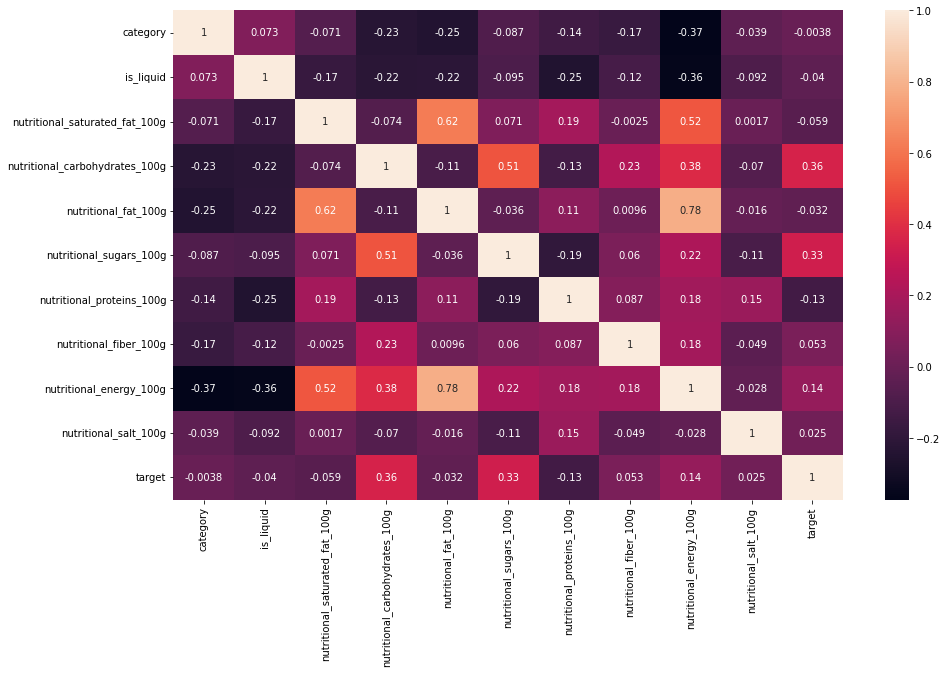

In [3]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# convert object data to float
le = LabelEncoder()

# prepare dataset
train_preparer = PrepareDataset(train_df, le)
train_df = train_preparer.prepare()

# visualize correlation
fig = plt.figure(figsize = (15, 9))
sns.heatmap(train_df.corr(), annot=True)

In [4]:
train_df

,category,is_liquid,nutritional_saturated_fat_100g,nutritional_carbohydrates_100g,nutritional_fat_100g,nutritional_sugars_100g,nutritional_proteins_100g,nutritional_fiber_100g,nutritional_energy_100g,nutritional_salt_100g,target
0,37,0,1.9,25.106827,16.8,0.8,16.7,4.3,272.0,1.41,1
1,29,0,0.9,51.000000,4.7,7.4,8.9,3.2,291.0,1.40,1
2,38,0,0.0,1.000000,0.0,0.0,0.7,1.2,9.0,0.80,0
3,29,0,0.6,49.000000,3.6,3.2,9.2,5.5,276.0,0.98,1
4,3,0,0.0,79.000000,1.0,0.0,5.1,0.0,352.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,41,0,5.0,14.400000,7.7,14.1,2.9,0.0,39.0,0.10,1
11996,12,0,3.5,0.200000,16.0,0.0,1.3,3.1,156.0,2.60,0
11997,8,0,2.3,1.500000,6.5,1.3,17.5,0.0,135.0,2.20,1
11998,33,0,6.8,3.500000,10.0,3.5,11.0,0.0,153.0,2.50,1


In [5]:
# get features and labels
train_labels = train_df['target']
train_df = train_df.drop(['target'], axis=1)
train_features = train_df[train_df.columns.values]

In [6]:
import torch

train_features_tensors = torch.autograd.Variable(torch.Tensor(train_features.values))
train_labels_tensors = torch.autograd.Variable(torch.Tensor(train_labels))

In [7]:
X_train_tensors_final = torch.reshape(train_features_tensors,   (train_features_tensors.shape[0], 1, train_features_tensors.shape[1]))
train_labels_tensors = torch.reshape(train_labels_tensors, (train_labels_tensors.shape[0], 1))

In [8]:
class LSTM1(torch.nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  torch.nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = torch.nn.Linear(128, num_classes) #fully connected last layer

        self.relu = torch.nn.ReLU()
    
    def forward(self,x):
        h_0 = torch.autograd.Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)) #hidden state
        c_0 = torch.autograd.Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x.to(device) , (h_0.to(device) , c_0.to(device) ))#lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [9]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 10 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [10]:
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3080 Ti Laptop GPU


In [11]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 
lstm1.to(device)

LSTM1(
  (lstm): LSTM(10, 2, batch_first=True)
  (fc_1): Linear(in_features=2, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [15]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
    # obtain the loss function
    loss = criterion(outputs.to(device), train_labels_tensors.to(device))
 
    loss.backward() #calculates the loss of the loss function
 
    optimizer.step() #improve from loss, i.e backprop
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.64620
Epoch: 100, loss: 0.23732
Epoch: 200, loss: 0.23513
Epoch: 300, loss: 0.22686
Epoch: 400, loss: 0.22464
Epoch: 500, loss: 0.22401
Epoch: 600, loss: 0.22363
Epoch: 700, loss: 0.22318
Epoch: 800, loss: 0.22280
Epoch: 900, loss: 0.22262


In [23]:
outputs[0]

tensor([0.6182], device='cuda:0', grad_fn=<SelectBackward0>)

In [24]:
train_labels_tensors[0]

tensor([1.])